In [1]:
# The following notebook  uses the  Excel file "BTC_Hourly_features.xlsx"
# This file contains 5 features: 
#  BTC/USD close price from Bitstamp Exchange
#  Volume transaction in BTC and USD equivalent units
#  Google Trends scores gathered
#  Count of tweets (gathered in the Data gathering folder)

import os
orig_dir = os.getcwd()
import pandas as pd
import numpy
df=pd.read_excel("BTC_Hourly_features.xlsx",sep=';',index_col=0)
df.head()

,Close,Volume BTC,Volume USD,Gtrends,#tweets
Datetime,,,,,
2017-07-01 11:00:00,2500.00,208.52,521903.70,3.228535,481.0
2017-07-01 12:00:00,2495.62,243.08,607308.42,3.188179,641.0
2017-07-01 13:00:00,2449.01,579.13,1421546.81,3.188179,699.0
2017-07-01 14:00:00,2457.90,528.75,1302198.58,3.268892,750.0
2017-07-01 15:00:00,2466.35,292.31,719666.88,3.268892,664.0


In [2]:
# We will explore visually those features & check correlation scores:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(17, 6)})

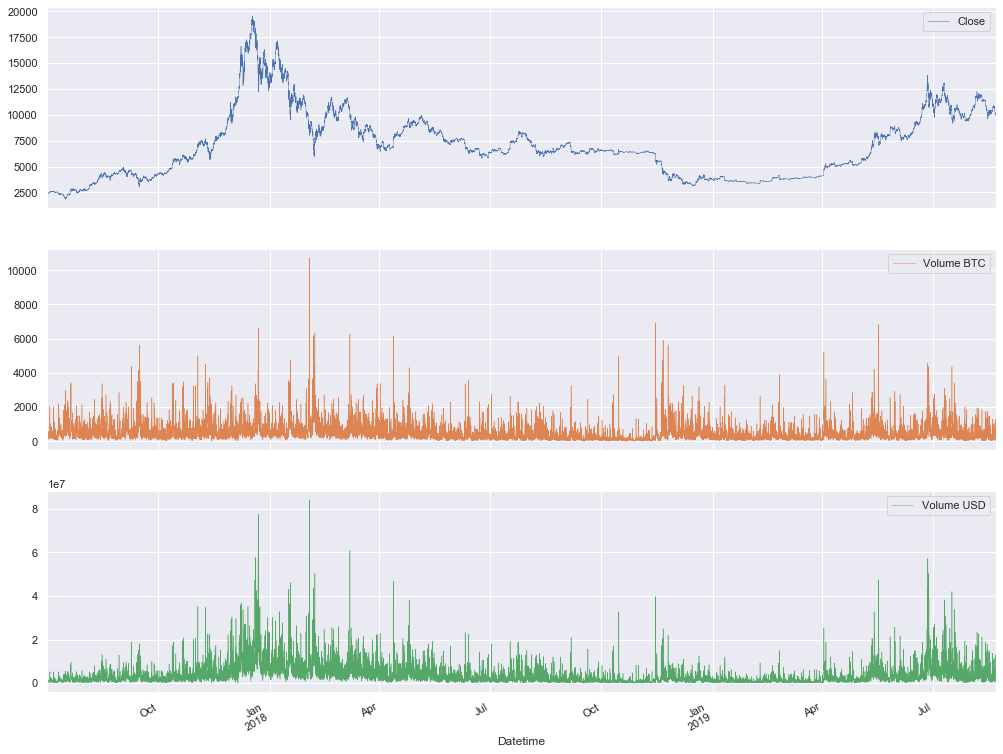

In [3]:
axes=df[['Close','Volume BTC','Volume USD']].plot(linewidth=0.5, figsize=(17, 14), subplots=True)

Observed zero values and discontinuities in Gtrends and #tweets


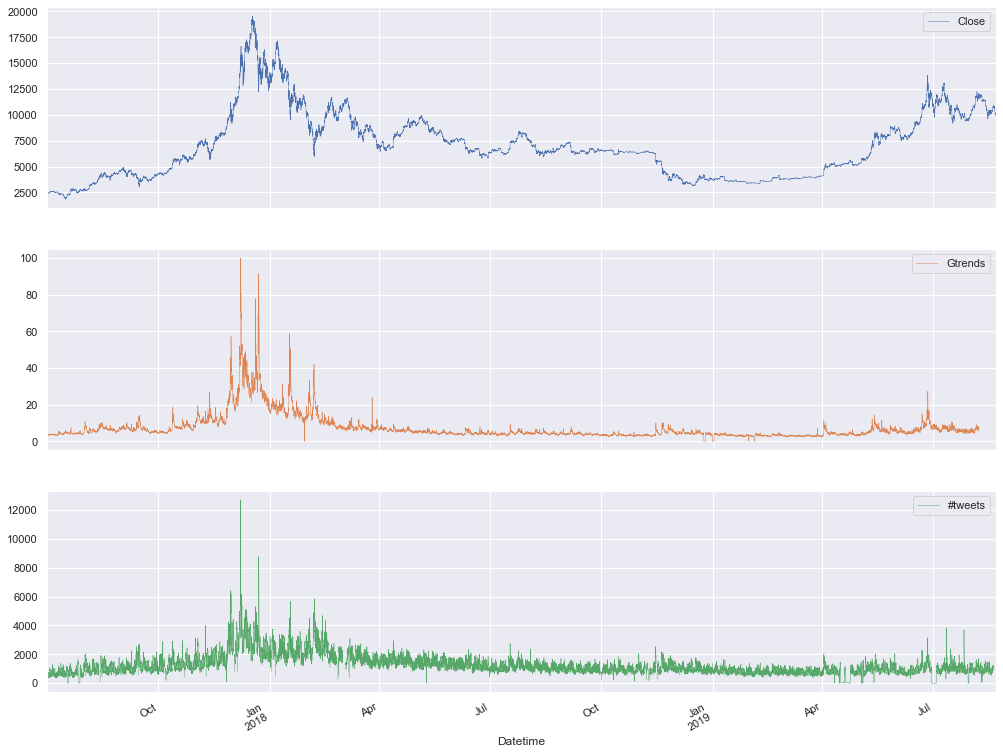

In [4]:
print("Observed zero values and discontinuities in Gtrends and #tweets")
axes=df[['Close','Gtrends','#tweets']].plot(linewidth=0.5, figsize=(17, 14), subplots=True)

In [5]:
#Correcting zero values(invalid) to NULL in google trends
print('Gtrends presents {} zero values and {} Nan values'.format((df['Gtrends']==0).sum(),(df['Gtrends'].isnull()).sum()))
df[['Gtrends']] = df[['Gtrends']].replace(0, numpy.NaN)
print('zero values are now Nan values for a total of {}'.format((df['Gtrends'].isnull()).sum()))

Gtrends presents 94 zero values and 335 Nan values
zero values are now Nan values for a total of 429


In [6]:
#Correcting zero values (invalid count) to NULL in Collected tweets
print('#tweets presents {} zero values and {} Nan values'.format((df['#tweets']==0).sum(),(df['#tweets'].isnull()).sum()))
df[['#tweets']] = df[['#tweets']].replace(0, numpy.NaN)
print('zero values are now NaN values for a total of {}'.format((df['#tweets'].isnull()).sum()))

#tweets presents 160 zero values and 626 Nan values
zero values are now NaN values for a total of 786


In [7]:
df.tail(10)

,Close,Volume BTC,Volume USD,Gtrends,#tweets
Datetime,,,,,
2019-08-21 14:00:00,10005.70,390.07,3901846.31,NaN,NaN
2019-08-21 15:00:00,9972.14,394.09,3949187.45,NaN,NaN
2019-08-21 16:00:00,10114.10,1292.90,13022764.87,NaN,NaN
2019-08-21 17:00:00,10097.61,217.06,2191602.17,NaN,NaN
2019-08-21 18:00:00,10064.59,175.33,1769712.95,NaN,NaN
2019-08-21 19:00:00,10104.37,101.56,1024267.50,NaN,NaN
2019-08-21 20:00:00,10154.45,247.39,2510457.43,NaN,NaN
2019-08-21 21:00:00,10046.47,156.63,1582927.11,NaN,NaN
2019-08-21 22:00:00,10063.37,85.95,864879.09,NaN,NaN


               Close  Volume BTC  Volume USD   Gtrends   #tweets
Close       1.000000    0.112718    0.487786  0.646506  0.572181
Volume BTC  0.112718    1.000000    0.850467  0.366571  0.418514
Volume USD  0.487786    0.850467    1.000000  0.618194  0.607905
Gtrends     0.646506    0.366571    0.618194  1.000000  0.780832
#tweets     0.572181    0.418514    0.607905  0.780832  1.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


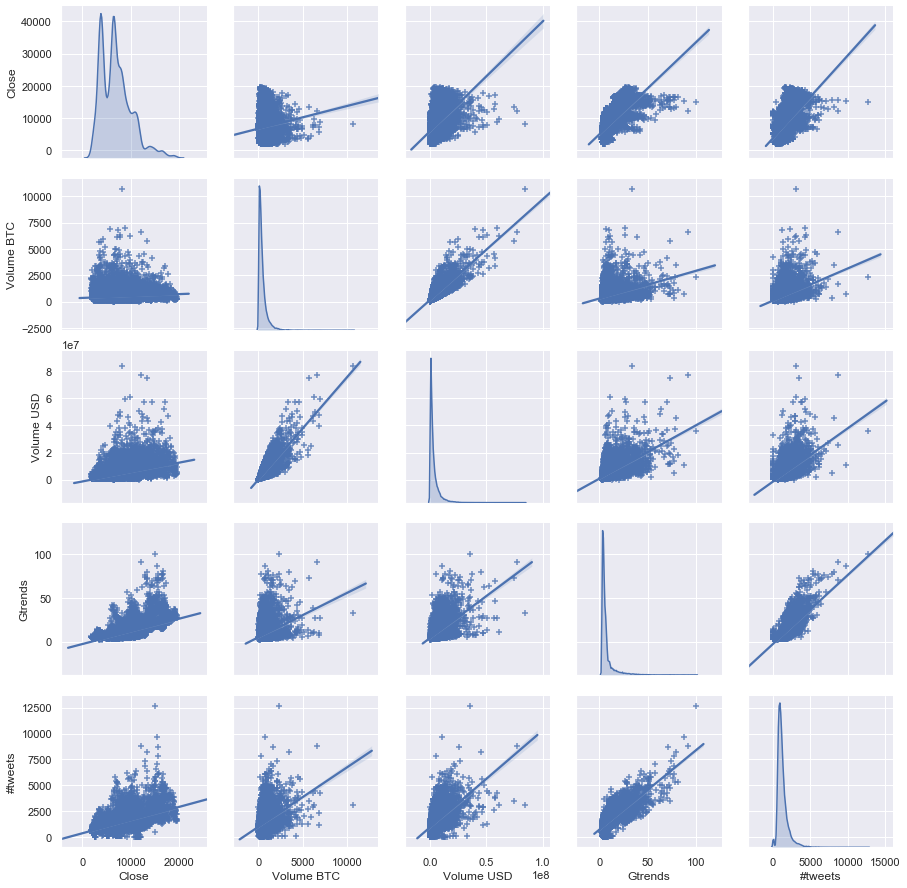

In [8]:
#df.cov().round()# direction of the linear relationship between variables#
print(df.corr())#measures both the strength and direction of the linear relationship between variables#
corr=sns.pairplot(df,kind="reg", markers="+",diag_kind='kde')

In [9]:
#Import Daily Bitcoin metrics from Coinmetrics community   ## from Coinmetric.io
##using active adress count, the NVT(adj and adj90days), mean number of transfers , and the mean "size" of a transaction 
# Periodicity of community data: DAILY (:S)
os.chdir(orig_dir)
#orig_dir = os.getcwd()# actual folder
os.chdir(os.path.abspath(os.path.join(orig_dir, os.pardir)))# cd to parent folder
coinmetricsbtc=pd.read_csv(os.getcwd()+'\\1 Data Gathering\Coinmetrics\BTC.csv'\
                           ,usecols=['date','PriceUSD','AdrActCnt','NVTAdj','NVTAdj90','TxTfr','TxTfrValMeanUSD','TxTfrValMeanNtv'])
coinmetricsbtc.rename(columns={'date':'Datetime'},inplace=True)
coinmetricsbtc['Datetime']=pd.to_datetime(coinmetricsbtc['Datetime'])
coinmetricsbtc.index=coinmetricsbtc['Datetime']# making it the index
coinmetricsbtc = coinmetricsbtc.sort_index()#sorting according the index
del coinmetricsbtc['Datetime']#Droping column , as it is already the index
print('Bitcoin daily metrics data types:\n {}'.format(coinmetricsbtc.dtypes))
print('Bitcoin daily metrics index type: {}'.format(coinmetricsbtc.index.dtype))
coinmetricsbtc=coinmetricsbtc[coinmetricsbtc.index >='2017-07-01']
print('from date {} to date {}'.format(coinmetricsbtc.index[0],coinmetricsbtc.index[-1]))
coinmetricsbtc=coinmetricsbtc[['PriceUSD','AdrActCnt','TxTfr','TxTfrValMeanUSD','TxTfrValMeanNtv','NVTAdj','NVTAdj90']]
coinmetricsbtc.head()

Bitcoin daily metrics data types:
 AdrActCnt            int64
NVTAdj             float64
NVTAdj90           float64
PriceUSD           float64
TxTfr                int64
TxTfrValMeanNtv    float64
TxTfrValMeanUSD    float64
dtype: object
Bitcoin daily metrics index type: datetime64[ns]
from date 2017-07-01 00:00:00 to date 2019-08-25 00:00:00


,PriceUSD,AdrActCnt,TxTfr,TxTfrValMeanUSD,TxTfrValMeanNtv,NVTAdj,NVTAdj90
Datetime,,,,,,,
2017-07-01,2391.069947,641147,526292,6354.975949,2.657796,37.314181,32.807864
2017-07-02,2501.550226,604820,484887,6281.414986,2.511009,45.881024,32.921171
2017-07-03,2547.906272,660964,586993,7984.064808,3.133579,31.398637,32.901562
2017-07-04,2594.902076,718284,652712,6127.365419,2.361309,34.077542,32.899106
2017-07-05,2602.805474,649605,565304,9048.309937,3.476368,29.253355,32.841126


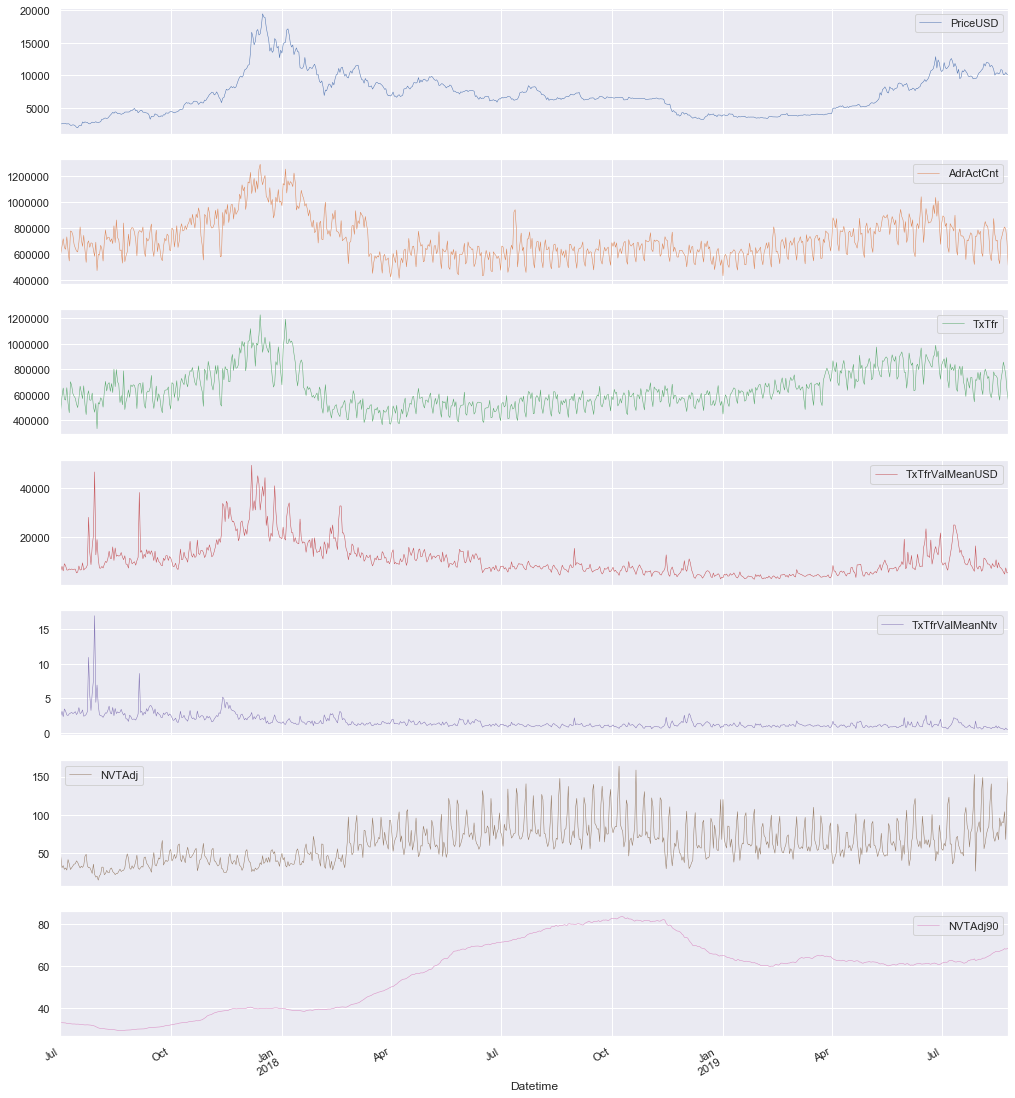

In [10]:
##Time series plots of Daily Data
axes=coinmetricsbtc.plot(linewidth=0.5, figsize=(17, 21), subplots=True)

                 PriceUSD  AdrActCnt     TxTfr  TxTfrValMeanUSD  \
PriceUSD         1.000000   0.580105  0.409982         0.644644   
AdrActCnt        0.580105   1.000000  0.829122         0.633526   
TxTfr            0.409982   0.829122  1.000000         0.388549   
TxTfrValMeanUSD  0.644644   0.633526  0.388549         1.000000   
TxTfrValMeanNtv -0.162197   0.160214  0.027510         0.548717   
NVTAdj           0.028808  -0.544251 -0.424631        -0.462434   
NVTAdj90        -0.080367  -0.423407 -0.217177        -0.514634   

                 TxTfrValMeanNtv    NVTAdj  NVTAdj90  
PriceUSD               -0.162197  0.028808 -0.080367  
AdrActCnt               0.160214 -0.544251 -0.423407  
TxTfr                   0.027510 -0.424631 -0.217177  
TxTfrValMeanUSD         0.548717 -0.462434 -0.514634  
TxTfrValMeanNtv         1.000000 -0.552456 -0.583955  
NVTAdj                 -0.552456  1.000000  0.635588  
NVTAdj90               -0.583955  0.635588  1.000000  


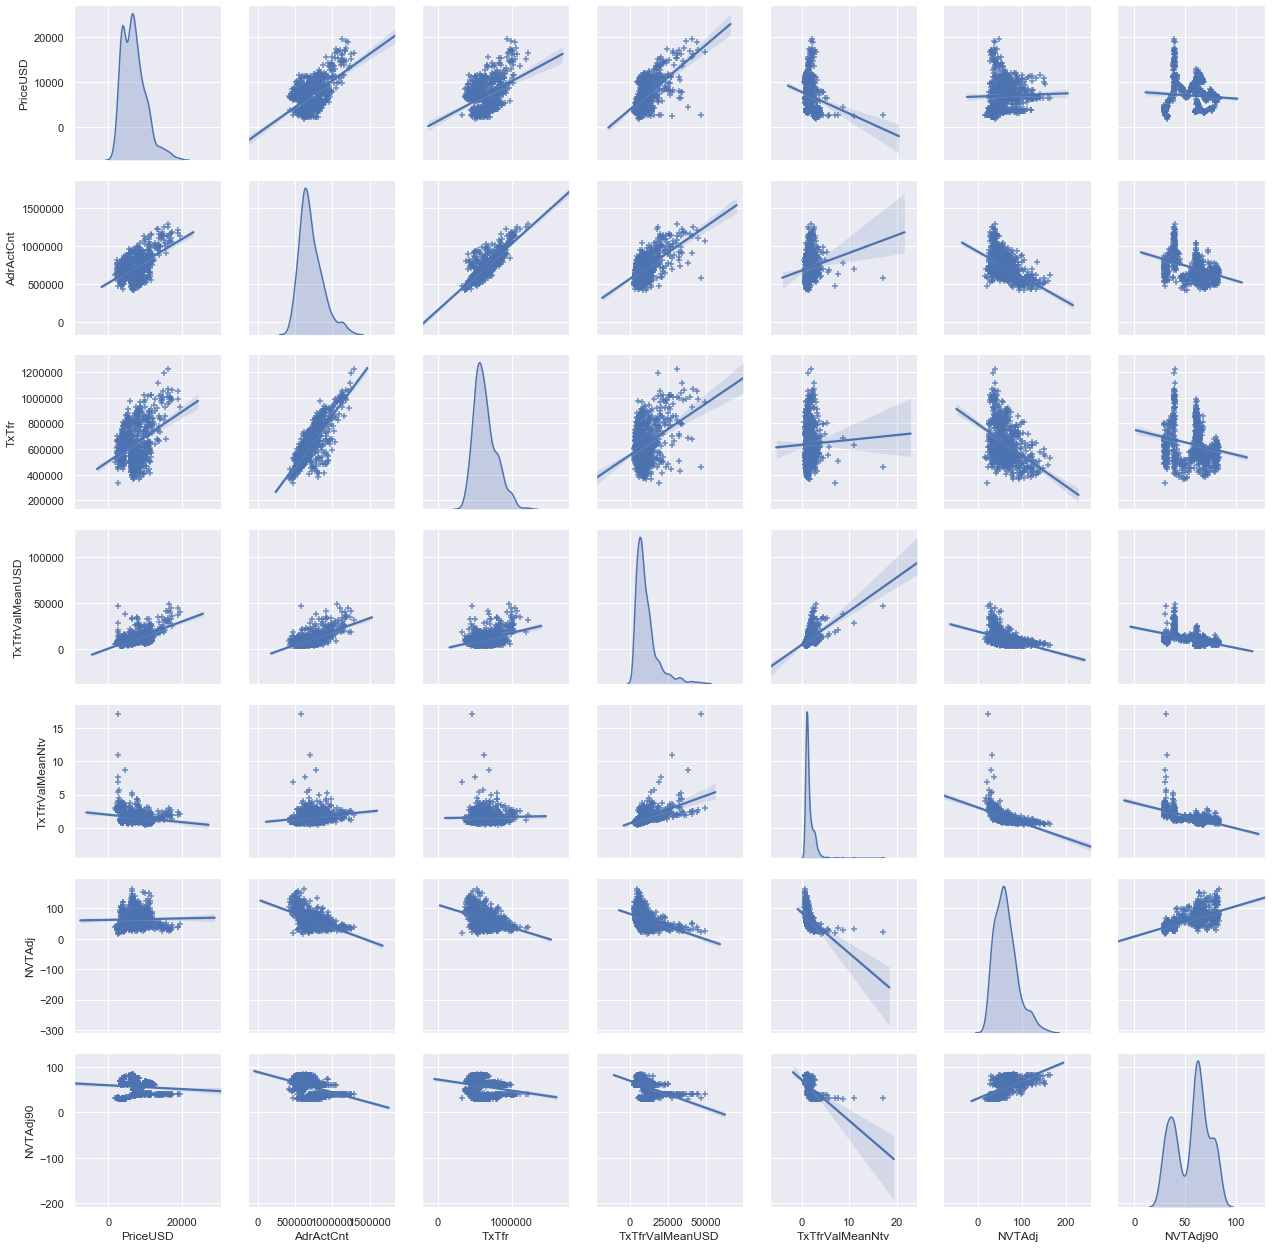

In [11]:
#DAILY DATA CORRELOGRAM
print(coinmetricsbtc.corr())#measures both the strength and direction of the linear relationship between variables#
corr=sns.pairplot(coinmetricsbtc,kind="reg", markers="+",diag_kind='kde')

In [12]:
del coinmetricsbtc['TxTfr']#the pairs TxTfr(Transaction value) - TxTfrValMean() are similar features in different units - see data dictionary of coinmetrics
del coinmetricsbtc['NVTAdj']#the indicator NVTAdj90() has higher correlation. 

In [13]:
#JOIN HOURLY corrected data with Daily data

#Joining coinmetrics df, as it is daily we use method fill to complete the daily values according:
ndf=pd.merge_ordered(df,coinmetricsbtc, how='left',on='Datetime',fill_method='ffill')
ndf.index=ndf['Datetime'] # restablisihng datetime index
del ndf['Datetime']
del ndf['PriceUSD']
#ndf = ndf.iloc[13:]
ndf.head()

,Close,Volume BTC,Volume USD,Gtrends,#tweets,AdrActCnt,TxTfrValMeanUSD,TxTfrValMeanNtv,NVTAdj90
Datetime,,,,,,,,,
2017-07-01 11:00:00,2500.00,208.52,521903.70,3.228535,481.0,NaN,NaN,NaN,NaN
2017-07-01 12:00:00,2495.62,243.08,607308.42,3.188179,641.0,NaN,NaN,NaN,NaN
2017-07-01 13:00:00,2449.01,579.13,1421546.81,3.188179,699.0,NaN,NaN,NaN,NaN
2017-07-01 14:00:00,2457.90,528.75,1302198.58,3.268892,750.0,NaN,NaN,NaN,NaN
2017-07-01 15:00:00,2466.35,292.31,719666.88,3.268892,664.0,NaN,NaN,NaN,NaN


In [14]:
ndf.tail()

,Close,Volume BTC,Volume USD,Gtrends,#tweets,AdrActCnt,TxTfrValMeanUSD,TxTfrValMeanNtv,NVTAdj90
Datetime,,,,,,,,,
2019-08-21 19:00:00,10104.37,101.56,1024267.50,NaN,NaN,784357.0,5782.852484,0.572739,67.707357
2019-08-21 20:00:00,10154.45,247.39,2510457.43,NaN,NaN,784357.0,5782.852484,0.572739,67.707357
2019-08-21 21:00:00,10046.47,156.63,1582927.11,NaN,NaN,784357.0,5782.852484,0.572739,67.707357
2019-08-21 22:00:00,10063.37,85.95,864879.09,NaN,NaN,784357.0,5782.852484,0.572739,67.707357
2019-08-21 23:00:00,10062.98,19.65,197925.78,NaN,NaN,784357.0,5782.852484,0.572739,67.707357


In [15]:
##Calculating technical analisis indicators with TA-Lib:
import sys
!{sys.executable} -m pip install TA-Lib
import talib as TA

In [16]:
##Relative Strength Index:
ndf['RSI']= TA.RSI(df['Close'], timeperiod=14)
###Triple Exponential Average
ndf['TRIX'] = TA.TRIX(df['Close'], timeperiod=30)
##Moving Average Convergence Divergence
macd, macdsignal, macdhist = TA.MACD(ndf['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
ndf['MACDhist']=macdhist

In [17]:
os.chdir(orig_dir)
ndf.to_excel("Dataset_raw.xlsx") 